# Importando Bibliotecas

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np

# Lendo os dados

Link para download: https://download.inep.gov.br/microdados/microdados_censo_da_educacao_superior_2020.zip

In [2]:
df_ies = pd.read_csv('Dados/MICRODADOS_CADASTRO_IES_2020.CSV', encoding='ISO-8859-15', sep = ';')
df_cursos = pd.read_csv('Dados/MICRODADOS_CADASTRO_CURSOS_2020.CSV', encoding='ISO-8859-15', sep = ';')

# EDA

## Quantas IES e alunos matriculados no ensino superior existem no país?

In [3]:
df_1_ies = df_ies.copy()[['CO_IES', 'SG_IES']]
df_1_ies

,CO_IES,SG_IES
0,1,UFMT
1,2,UNB
2,3,UFS
3,4,UFAM
4,5,UFPI
...,...,...
2452,25274,UFCAT
2453,25275,UFAPE
2454,25277,UFDPAR
2455,25282,UFJ


In [4]:
ies = df_1_ies['CO_IES'].nunique()
print(f'No Brasil existem {ies} Instituicoes de Ensino Superior (IES)')

No Brasil existem 2457 Instituicoes de Ensino Superior (IES)


In [5]:
df_1_cursos = df_cursos.copy()[['CO_IES', 'NO_UF', 'NO_REGIAO', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_MODALIDADE_ENSINO', 'QT_MAT']]
df_1_cursos

,CO_IES,NO_UF,NO_REGIAO,TP_CATEGORIA_ADMINISTRATIVA,TP_MODALIDADE_ENSINO,QT_MAT
0,1,Mato Grosso,Centro-Oeste,1,2,38
1,1,Mato Grosso,Centro-Oeste,1,2,28
2,1,Mato Grosso,Centro-Oeste,1,2,34
3,1,Mato Grosso,Centro-Oeste,1,2,22
4,1,Mato Grosso,Centro-Oeste,1,2,33
...,...,...,...,...,...,...
335624,25352,Mato Grosso,Centro-Oeste,1,1,378
335625,25352,Mato Grosso,Centro-Oeste,1,1,341
335626,25352,Mato Grosso,Centro-Oeste,1,1,279
335627,25352,Mato Grosso,Centro-Oeste,1,1,205


In [6]:
alunos = df_1_cursos['QT_MAT'].sum()
print(f'No Brasil existem {alunos} alunos inscritos em algum curso de IES')

No Brasil existem 8680945 alunos inscritos em algum curso de IES


In [7]:
print(f'Com as informações apresentadas anteriormente, podemos concluir que a média de aluno por IES é de {int(alunos/ies)}')

Com as informações apresentadas anteriormente, podemos concluir que a média de aluno por IES é de 3533


### Indo além

In [8]:
df_1 = df_1_cursos.merge(df_1_ies, how='left', left_on='CO_IES', right_on='CO_IES')
df_1

,CO_IES,NO_UF,NO_REGIAO,TP_CATEGORIA_ADMINISTRATIVA,TP_MODALIDADE_ENSINO,QT_MAT,SG_IES
0,1,Mato Grosso,Centro-Oeste,1,2,38,UFMT
1,1,Mato Grosso,Centro-Oeste,1,2,28,UFMT
2,1,Mato Grosso,Centro-Oeste,1,2,34,UFMT
3,1,Mato Grosso,Centro-Oeste,1,2,22,UFMT
4,1,Mato Grosso,Centro-Oeste,1,2,33,UFMT
...,...,...,...,...,...,...,...
335624,25352,Mato Grosso,Centro-Oeste,1,1,378,UFR
335625,25352,Mato Grosso,Centro-Oeste,1,1,341,UFR
335626,25352,Mato Grosso,Centro-Oeste,1,1,279,UFR
335627,25352,Mato Grosso,Centro-Oeste,1,1,205,UFR


In [9]:
df_1_pivot = pd.pivot_table(data=df_1, values='QT_MAT', aggfunc='sum', columns='SG_IES').transpose()
df_1_pivot.sort_values('QT_MAT', ascending=False, inplace=True)
df_1_pivot.reset_index(inplace=True)
df_1_pivot

,SG_IES,QT_MAT
0,UNIP,462253
1,UNIASSELVI,400280
2,UNESA,365772
3,UNINTER,200439
4,UNICESUMAR,199283
...,...,...
1751,UNI-BAN,0
1752,FABC,0
1753,FACEAT,0
1754,FAEVA,0


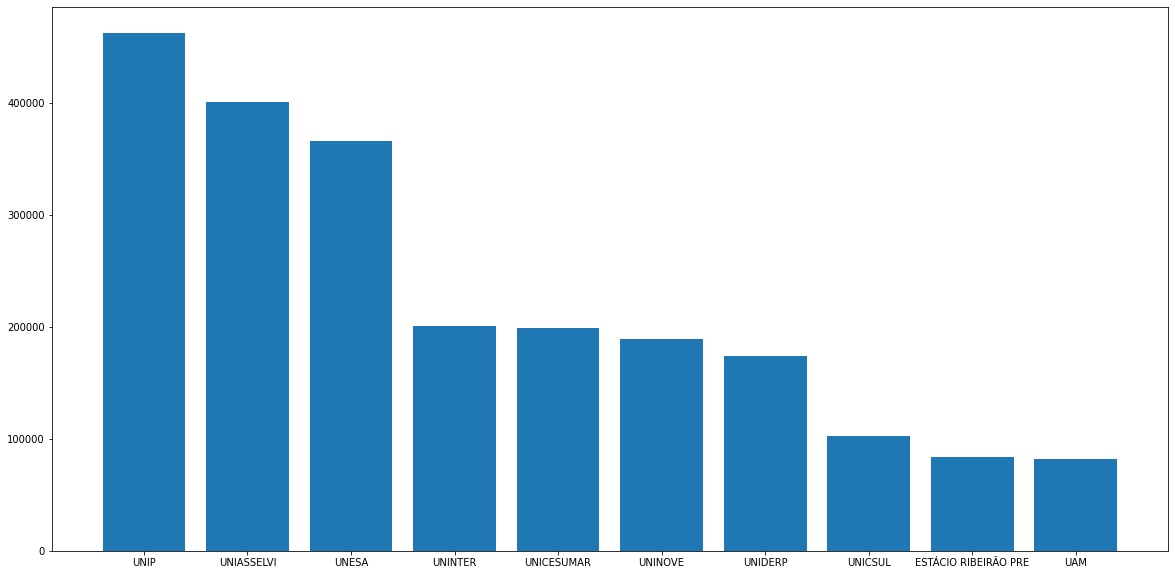

In [10]:
plt.figure(figsize=(20,10))
plt.bar(data = df_1_pivot[:10], x='SG_IES', height='QT_MAT')
plt.show()

## Como é a distribuição de Universidades nas regiões do Brasil? Existe alguma diferença na distribuição entre Universidades Públicas e Universidades Privadas?

In [11]:
df_2_ies = df_ies.copy()[['NO_REGIAO_IES', 'SG_IES', 'TP_CATEGORIA_ADMINISTRATIVA']]
df_2_ies

,NO_REGIAO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA
0,Centro-Oeste,UFMT,1
1,Centro-Oeste,UNB,1
2,Nordeste,UFS,1
3,Norte,UFAM,1
4,Nordeste,UFPI,1
...,...,...,...
2452,Centro-Oeste,UFCAT,1
2453,Nordeste,UFAPE,1
2454,Nordeste,UFDPAR,1
2455,Centro-Oeste,UFJ,1


In [12]:
def get_admin_cat(id):
    if id <= 3:
        return 'PUBLICA'
    else:
        return 'PRIVADA'

In [13]:
df_2_ies['TP_CATEGORIA_ADMINISTRATIVA'] = df_2_ies['TP_CATEGORIA_ADMINISTRATIVA'].apply(get_admin_cat)
df_2_ies

,NO_REGIAO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA
0,Centro-Oeste,UFMT,PUBLICA
1,Centro-Oeste,UNB,PUBLICA
2,Nordeste,UFS,PUBLICA
3,Norte,UFAM,PUBLICA
4,Nordeste,UFPI,PUBLICA
...,...,...,...
2452,Centro-Oeste,UFCAT,PUBLICA
2453,Nordeste,UFAPE,PUBLICA
2454,Nordeste,UFDPAR,PUBLICA
2455,Centro-Oeste,UFJ,PUBLICA


In [14]:
df_2_pivot_1 = pd.pivot_table(data=df_2_ies, values='SG_IES', aggfunc='count', columns='NO_REGIAO_IES').transpose()
df_2_pivot_1.reset_index(inplace=True)
df_2_pivot_1
#Note que a soma é diferente das 2457 IES que havíamos calculado, por que? Existem IES com a sigla vazia

,NO_REGIAO_IES,SG_IES
0,Centro-Oeste,224
1,Nordeste,460
2,Norte,157
3,Sudeste,901
4,Sul,304


In [15]:
df_2_null = df_2_ies.loc[df_2_ies['SG_IES'].isna()]
df_2_null.reset_index(inplace=True, drop=True)
df_2_null

,NO_REGIAO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA
0,Sudeste,NaN,PRIVADA
1,Sudeste,NaN,PRIVADA
2,Sudeste,NaN,PRIVADA
3,Sudeste,NaN,PRIVADA
4,Sudeste,NaN,PRIVADA
...,...,...,...
406,Sudeste,NaN,PUBLICA
407,Sudeste,NaN,PUBLICA
408,Sudeste,NaN,PRIVADA
409,Centro-Oeste,NaN,PRIVADA


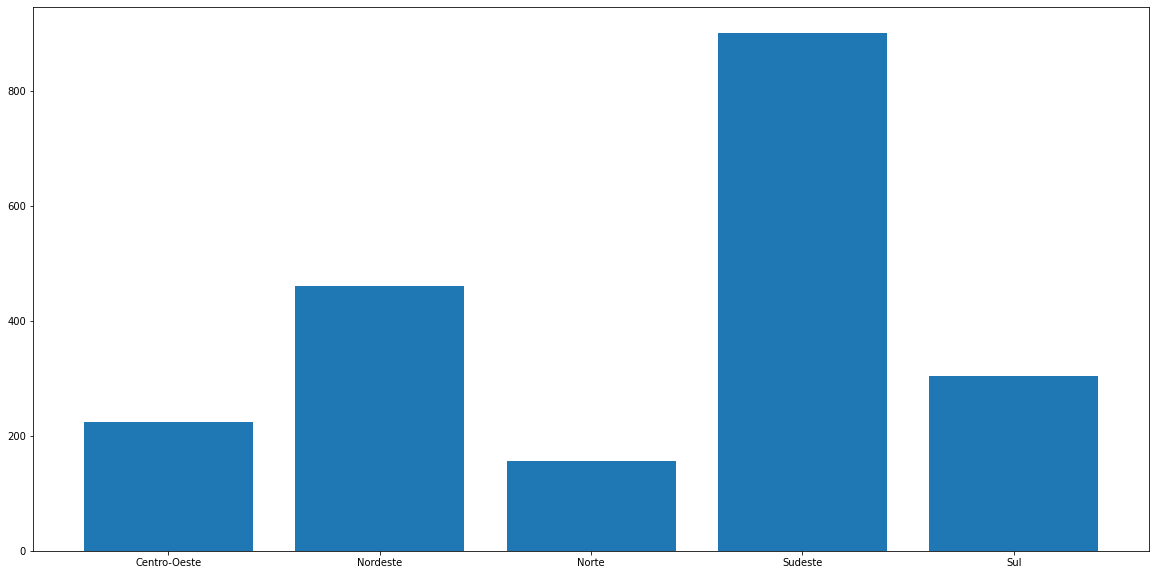

In [16]:
plt.figure(figsize=(20,10))
plt.bar(data=df_2_pivot_1, x='NO_REGIAO_IES', height='SG_IES')
plt.show()

In [17]:
df_2_pivot_2 = pd.pivot_table(data=df_2_ies, values='SG_IES', aggfunc='count', columns=['NO_REGIAO_IES', 'TP_CATEGORIA_ADMINISTRATIVA']).transpose()
df_2_pivot_2.reset_index(inplace=True)
df_2_pivot_2

,NO_REGIAO_IES,TP_CATEGORIA_ADMINISTRATIVA,SG_IES
0,Centro-Oeste,PRIVADA,202
1,Centro-Oeste,PUBLICA,22
2,Nordeste,PRIVADA,414
3,Nordeste,PUBLICA,46
4,Norte,PRIVADA,134
5,Norte,PUBLICA,23
6,Sudeste,PRIVADA,753
7,Sudeste,PUBLICA,148
8,Sul,PRIVADA,273
9,Sul,PUBLICA,31


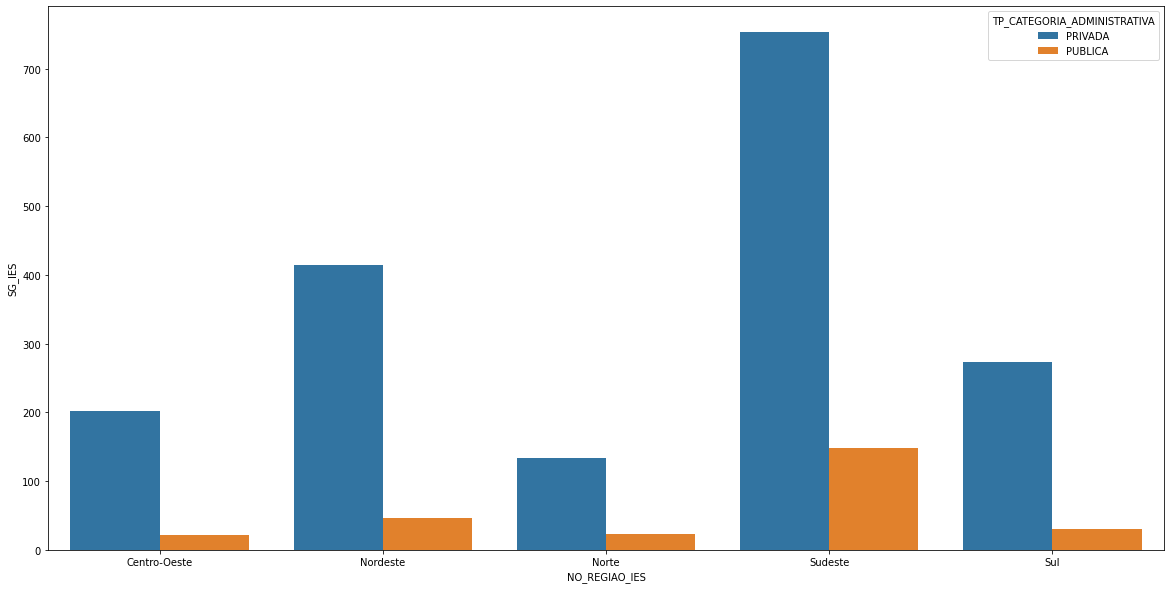

In [18]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_2_pivot_2, x='NO_REGIAO_IES', y='SG_IES', hue='TP_CATEGORIA_ADMINISTRATIVA')
plt.show()

## Qual é a proporção de vagas ocupadas por tipo de Universidade?

In [19]:
df_cursos.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_ORGANIZACAO_ACADEMICA,...,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
0,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Água Boa,5100201.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Água Boa,5100201.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Água Boa,5100201.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Alto Araguaia,5100300.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Arenápolis,5101308.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_3_ies = df_ies.copy()[['CO_IES', 'SG_IES', 'TP_CATEGORIA_ADMINISTRATIVA']]
df_3_ies

,CO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA
0,1,UFMT,1
1,2,UNB,1
2,3,UFS,1
3,4,UFAM,1
4,5,UFPI,1
...,...,...,...
2452,25274,UFCAT,1
2453,25275,UFAPE,1
2454,25277,UFDPAR,1
2455,25282,UFJ,1


In [21]:
df_3_cursos = df_cursos.copy()[['CO_IES', 'NO_REGIAO', 'QT_VG_TOTAL', 'QT_ING']]
df_3_cursos

,CO_IES,NO_REGIAO,QT_VG_TOTAL,QT_ING
0,1,Centro-Oeste,0,0
1,1,Centro-Oeste,0,14
2,1,Centro-Oeste,0,0
3,1,Centro-Oeste,0,0
4,1,Centro-Oeste,0,33
...,...,...,...,...
335624,25352,Centro-Oeste,86,40
335625,25352,Centro-Oeste,96,63
335626,25352,Centro-Oeste,68,55
335627,25352,Centro-Oeste,45,46


In [22]:
df_3 = df_3_cursos.merge(df_3_ies, how='left', left_on='CO_IES', right_on='CO_IES')
df_3

,CO_IES,NO_REGIAO,QT_VG_TOTAL,QT_ING,SG_IES,TP_CATEGORIA_ADMINISTRATIVA
0,1,Centro-Oeste,0,0,UFMT,1
1,1,Centro-Oeste,0,14,UFMT,1
2,1,Centro-Oeste,0,0,UFMT,1
3,1,Centro-Oeste,0,0,UFMT,1
4,1,Centro-Oeste,0,33,UFMT,1
...,...,...,...,...,...,...
335624,25352,Centro-Oeste,86,40,UFR,1
335625,25352,Centro-Oeste,96,63,UFR,1
335626,25352,Centro-Oeste,68,55,UFR,1
335627,25352,Centro-Oeste,45,46,UFR,1


In [23]:
df_3_pivot = pd.pivot_table(data=df_3, values=['QT_VG_TOTAL', 'QT_ING'], aggfunc='sum',columns=['CO_IES', 'NO_REGIAO', 'SG_IES', 'TP_CATEGORIA_ADMINISTRATIVA']).transpose()
df_3_pivot.reset_index(inplace=True)
df_3_pivot

,CO_IES,NO_REGIAO,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,QT_ING,QT_VG_TOTAL
0,1,Centro-Oeste,UFMT,1,4022,5395
1,2,Centro-Oeste,UNB,1,8762,11493
2,2,Nordeste,UNB,1,0,0
3,2,Norte,UNB,1,66,0
4,2,Sudeste,UNB,1,166,0
...,...,...,...,...,...,...
2397,25274,Centro-Oeste,UFCAT,1,994,1377
2398,25275,Nordeste,UFAPE,1,557,750
2399,25277,Nordeste,UFDPAR,1,750,1090
2400,25282,Centro-Oeste,UFJ,1,891,1332


In [24]:
def get_admin_cat(id):
    if id <= 3:
        return 'PUBLICA'
    else:
        return 'PRIVADA'

In [25]:
df_3_pivot['TP_CATEGORIA_ADMINISTRATIVA'] = df_3_pivot['TP_CATEGORIA_ADMINISTRATIVA'].apply(get_admin_cat)
df_3_pivot

,CO_IES,NO_REGIAO,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,QT_ING,QT_VG_TOTAL
0,1,Centro-Oeste,UFMT,PUBLICA,4022,5395
1,2,Centro-Oeste,UNB,PUBLICA,8762,11493
2,2,Nordeste,UNB,PUBLICA,0,0
3,2,Norte,UNB,PUBLICA,66,0
4,2,Sudeste,UNB,PUBLICA,166,0
...,...,...,...,...,...,...
2397,25274,Centro-Oeste,UFCAT,PUBLICA,994,1377
2398,25275,Nordeste,UFAPE,PUBLICA,557,750
2399,25277,Nordeste,UFDPAR,PUBLICA,750,1090
2400,25282,Centro-Oeste,UFJ,PUBLICA,891,1332


In [26]:
df_3_pivot_2 = pd.pivot_table(data=df_3_pivot, values=['QT_ING', 'QT_VG_TOTAL'], aggfunc='sum', columns='TP_CATEGORIA_ADMINISTRATIVA').transpose()
df_3_pivot_2.reset_index(inplace=True)
df_3_pivot_2

,TP_CATEGORIA_ADMINISTRATIVA,QT_ING,QT_VG_TOTAL
0,PRIVADA,2713633,4720101
1,PUBLICA,518115,704012


In [27]:
df_3_pivot_2['TX_OCUPACAO'] = round(df_3_pivot_2['QT_ING']/df_3_pivot_2['QT_VG_TOTAL']*100,2)
df_3_pivot_2

,TP_CATEGORIA_ADMINISTRATIVA,QT_ING,QT_VG_TOTAL,TX_OCUPACAO
0,PRIVADA,2713633,4720101,57.49
1,PUBLICA,518115,704012,73.59


In [28]:
y_label=[100,100]

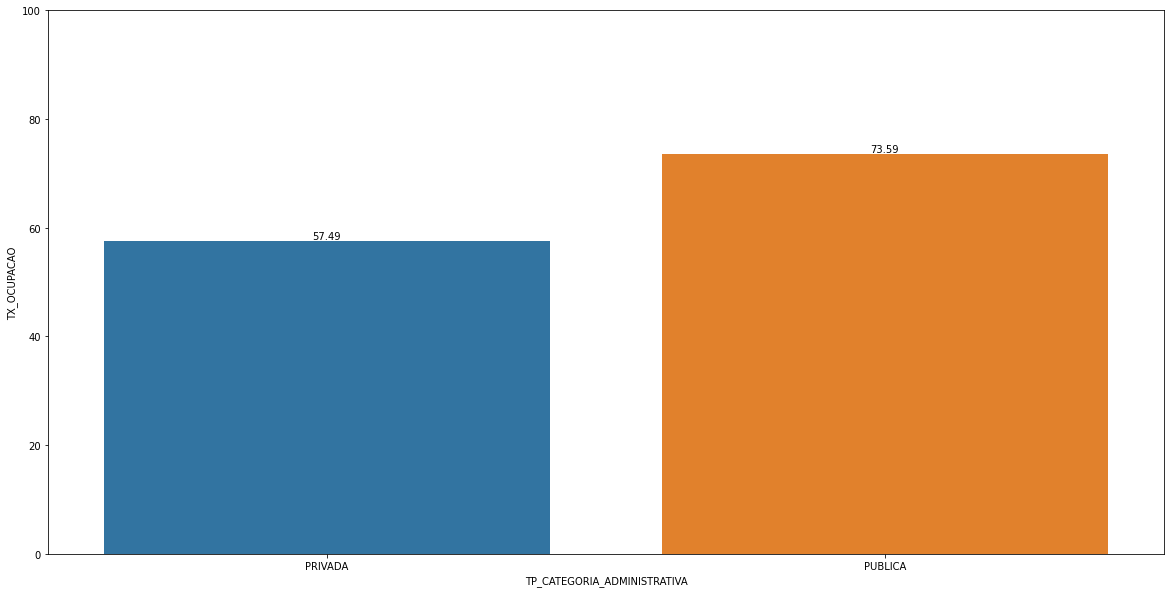

In [29]:
plt.figure(figsize=(20,10))
plt.ylim((0,100))
ax = sns.barplot(data=df_3_pivot_2, x='TP_CATEGORIA_ADMINISTRATIVA', y='TX_OCUPACAO')
ax.bar_label(ax.containers[0])
plt.show()

## Como é a distribuição de matrículas de acordo com a modalidade (Presencial e EAD)?

In [30]:
df_4_ies = df_ies.copy()[['CO_IES', 'SG_IES']]
df_4_ies

,CO_IES,SG_IES
0,1,UFMT
1,2,UNB
2,3,UFS
3,4,UFAM
4,5,UFPI
...,...,...
2452,25274,UFCAT
2453,25275,UFAPE
2454,25277,UFDPAR
2455,25282,UFJ


In [31]:
df_4_cursos = df_cursos.copy()[['CO_IES', 'NO_UF', 'NO_REGIAO', 'TP_MODALIDADE_ENSINO', 'QT_MAT']]
df_4_cursos

,CO_IES,NO_UF,NO_REGIAO,TP_MODALIDADE_ENSINO,QT_MAT
0,1,Mato Grosso,Centro-Oeste,2,38
1,1,Mato Grosso,Centro-Oeste,2,28
2,1,Mato Grosso,Centro-Oeste,2,34
3,1,Mato Grosso,Centro-Oeste,2,22
4,1,Mato Grosso,Centro-Oeste,2,33
...,...,...,...,...,...
335624,25352,Mato Grosso,Centro-Oeste,1,378
335625,25352,Mato Grosso,Centro-Oeste,1,341
335626,25352,Mato Grosso,Centro-Oeste,1,279
335627,25352,Mato Grosso,Centro-Oeste,1,205


In [32]:
df_4 = df_4_cursos.merge(df_4_ies, how='left', left_on='CO_IES', right_on='CO_IES')
df_4

,CO_IES,NO_UF,NO_REGIAO,TP_MODALIDADE_ENSINO,QT_MAT,SG_IES
0,1,Mato Grosso,Centro-Oeste,2,38,UFMT
1,1,Mato Grosso,Centro-Oeste,2,28,UFMT
2,1,Mato Grosso,Centro-Oeste,2,34,UFMT
3,1,Mato Grosso,Centro-Oeste,2,22,UFMT
4,1,Mato Grosso,Centro-Oeste,2,33,UFMT
...,...,...,...,...,...,...
335624,25352,Mato Grosso,Centro-Oeste,1,378,UFR
335625,25352,Mato Grosso,Centro-Oeste,1,341,UFR
335626,25352,Mato Grosso,Centro-Oeste,1,279,UFR
335627,25352,Mato Grosso,Centro-Oeste,1,205,UFR


In [33]:
def get_study_model(id):
    if id == 1:
        return 'PRESENCIAL'
    else:
        return 'EAD'

In [34]:
df_4['TP_MODALIDADE_ENSINO'] = df_4['TP_MODALIDADE_ENSINO'].apply(get_study_model)
df_4

,CO_IES,NO_UF,NO_REGIAO,TP_MODALIDADE_ENSINO,QT_MAT,SG_IES
0,1,Mato Grosso,Centro-Oeste,EAD,38,UFMT
1,1,Mato Grosso,Centro-Oeste,EAD,28,UFMT
2,1,Mato Grosso,Centro-Oeste,EAD,34,UFMT
3,1,Mato Grosso,Centro-Oeste,EAD,22,UFMT
4,1,Mato Grosso,Centro-Oeste,EAD,33,UFMT
...,...,...,...,...,...,...
335624,25352,Mato Grosso,Centro-Oeste,PRESENCIAL,378,UFR
335625,25352,Mato Grosso,Centro-Oeste,PRESENCIAL,341,UFR
335626,25352,Mato Grosso,Centro-Oeste,PRESENCIAL,279,UFR
335627,25352,Mato Grosso,Centro-Oeste,PRESENCIAL,205,UFR


In [35]:
df_4_pivot = pd.pivot_table(data=df_4, values='QT_MAT', aggfunc='sum', columns='TP_MODALIDADE_ENSINO').transpose()
df_4_pivot.reset_index(inplace=True)
df_4_pivot

,TP_MODALIDADE_ENSINO,QT_MAT
0,EAD,3105803
1,PRESENCIAL,5575142


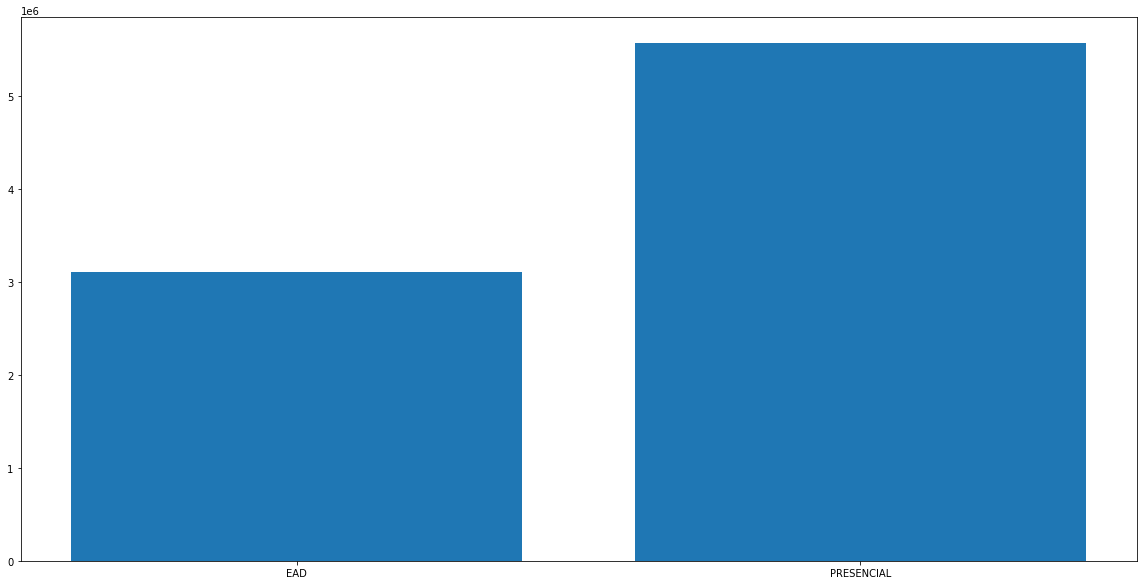

In [36]:
plt.figure(figsize=(20,10))
plt.bar(data=df_4_pivot, x='TP_MODALIDADE_ENSINO', height='QT_MAT')
plt.show()

### Indo além

In [37]:
df_4_pivot_2 = pd.pivot_table(df_4, values='QT_MAT', aggfunc='sum', columns=['NO_REGIAO', 'TP_MODALIDADE_ENSINO', 'SG_IES']).transpose()
df_4_pivot_2.reset_index(inplace=True)
df_4_pivot_2

,NO_REGIAO,TP_MODALIDADE_ENSINO,SG_IES,QT_MAT
0,Centro-Oeste,EAD,AIEC / FAAB,51
1,Centro-Oeste,EAD,AJES,19
2,Centro-Oeste,EAD,CAM,353
3,Centro-Oeste,EAD,CEUCLAR,2442
4,Centro-Oeste,EAD,EBAPE,30
...,...,...,...,...
2645,Sul,PRESENCIAL,UTP,8237
2646,Sul,PRESENCIAL,UniCuritiba,1696
2647,Sul,PRESENCIAL,UniSATC,1318
2648,Sul,PRESENCIAL,Uniopet,2206


In [38]:
#Maiores EAD
df_4_ead = df_4_pivot_2.loc[df_4_pivot_2['TP_MODALIDADE_ENSINO']=='EAD'].sort_values('QT_MAT', ascending=False)[0:10]
df_4_ead.reset_index(inplace=True, drop=True)
df_4_ead

,NO_REGIAO,TP_MODALIDADE_ENSINO,SG_IES,QT_MAT
0,Sul,EAD,UNIASSELVI,178299
1,Sudeste,EAD,UNESA,155596
2,Sudeste,EAD,UNIP,101022
3,Sudeste,EAD,UNIDERP,94577
4,Sul,EAD,UNINTER,88429
5,Nordeste,EAD,UNIASSELVI,86501
6,Norte,EAD,UNIP,73090
7,Sul,EAD,UNICESUMAR,69515
8,Sudeste,EAD,UNICESUMAR,65236
9,Sudeste,EAD,UNINTER,62748


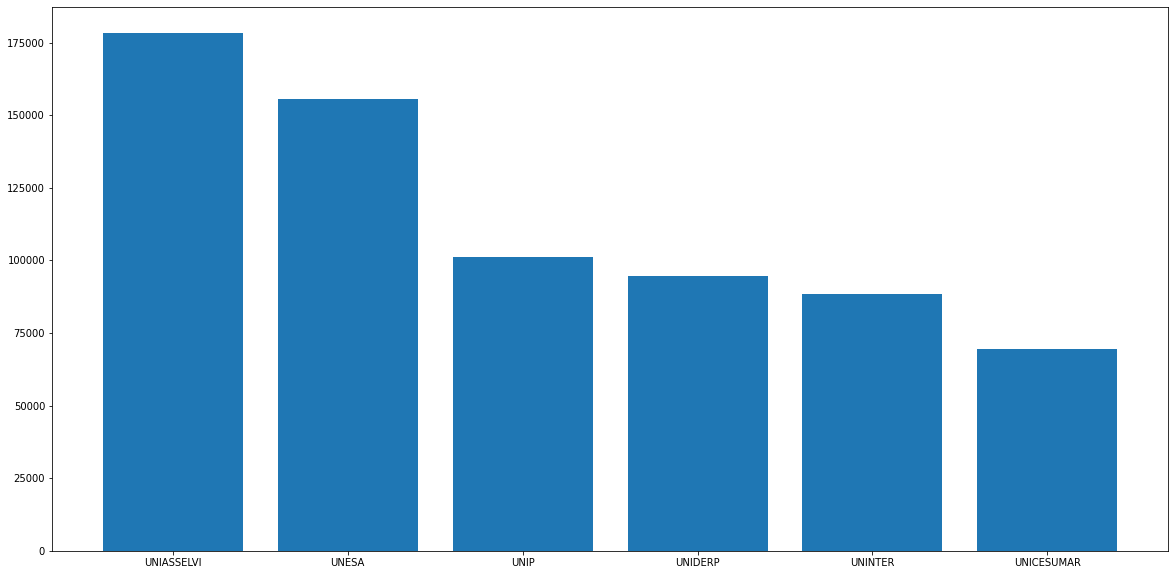

In [39]:
plt.figure(figsize=(20,10))
plt.bar(data=df_4_ead, x='SG_IES', height='QT_MAT')
plt.show()

In [40]:
#Maiores presenciais
df_4_presencial = df_4_pivot_2.loc[df_4_pivot_2['TP_MODALIDADE_ENSINO']=='PRESENCIAL'].sort_values('QT_MAT', ascending=False)[0:10]
df_4_presencial.reset_index(inplace=True, drop=True)
df_4_presencial

,NO_REGIAO,TP_MODALIDADE_ENSINO,SG_IES,QT_MAT
0,Sudeste,PRESENCIAL,UNIP,168584
1,Sudeste,PRESENCIAL,UNINOVE,130541
2,Sudeste,PRESENCIAL,UNESA,114890
3,Sudeste,PRESENCIAL,USP,64256
4,Sudeste,PRESENCIAL,UAM,48459
5,Sudeste,PRESENCIAL,FMU,43849
6,Sudeste,PRESENCIAL,UFRJ,42083
7,Sudeste,PRESENCIAL,PUC MINAS,40581
8,Centro-Oeste,PRESENCIAL,UNB,36892
9,Nordeste,PRESENCIAL,UFMA,36721


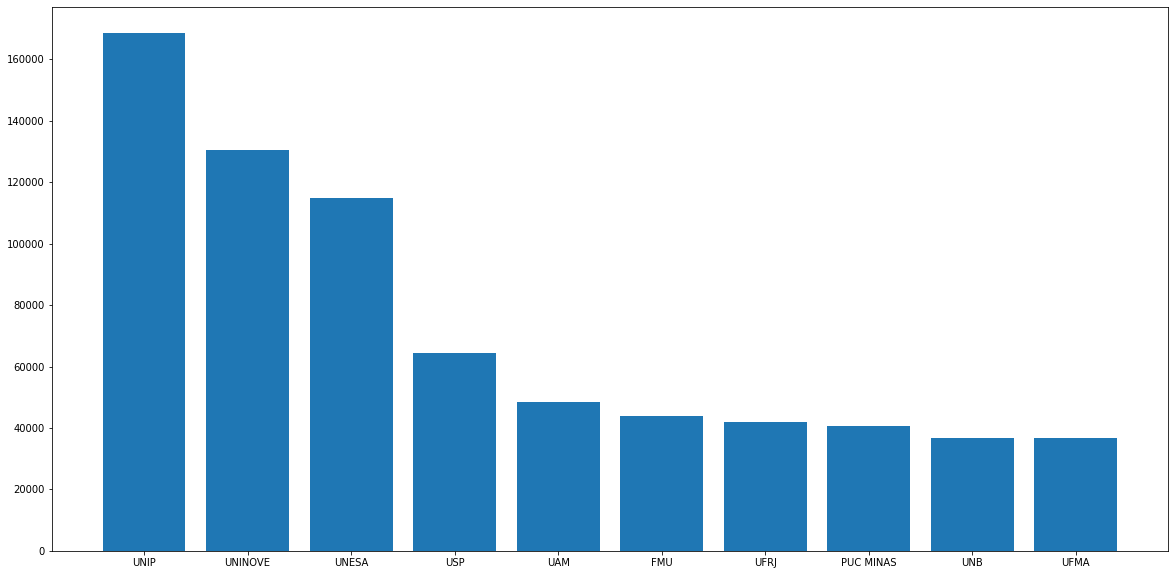

In [41]:
plt.figure(figsize=(20,10))
plt.bar(data=df_4_presencial, x='SG_IES', height='QT_MAT')
plt.show()

In [42]:
df_4_filtered = df_4_pivot_2.sort_values('QT_MAT', ascending=False)[0:20]
df_4_filtered.reset_index(inplace=True, drop=True)
df_4_filtered

,NO_REGIAO,TP_MODALIDADE_ENSINO,SG_IES,QT_MAT
0,Sul,EAD,UNIASSELVI,178299
1,Sudeste,PRESENCIAL,UNIP,168584
2,Sudeste,EAD,UNESA,155596
3,Sudeste,PRESENCIAL,UNINOVE,130541
4,Sudeste,PRESENCIAL,UNESA,114890
5,Sudeste,EAD,UNIP,101022
6,Sudeste,EAD,UNIDERP,94577
7,Sul,EAD,UNINTER,88429
8,Nordeste,EAD,UNIASSELVI,86501
9,Norte,EAD,UNIP,73090


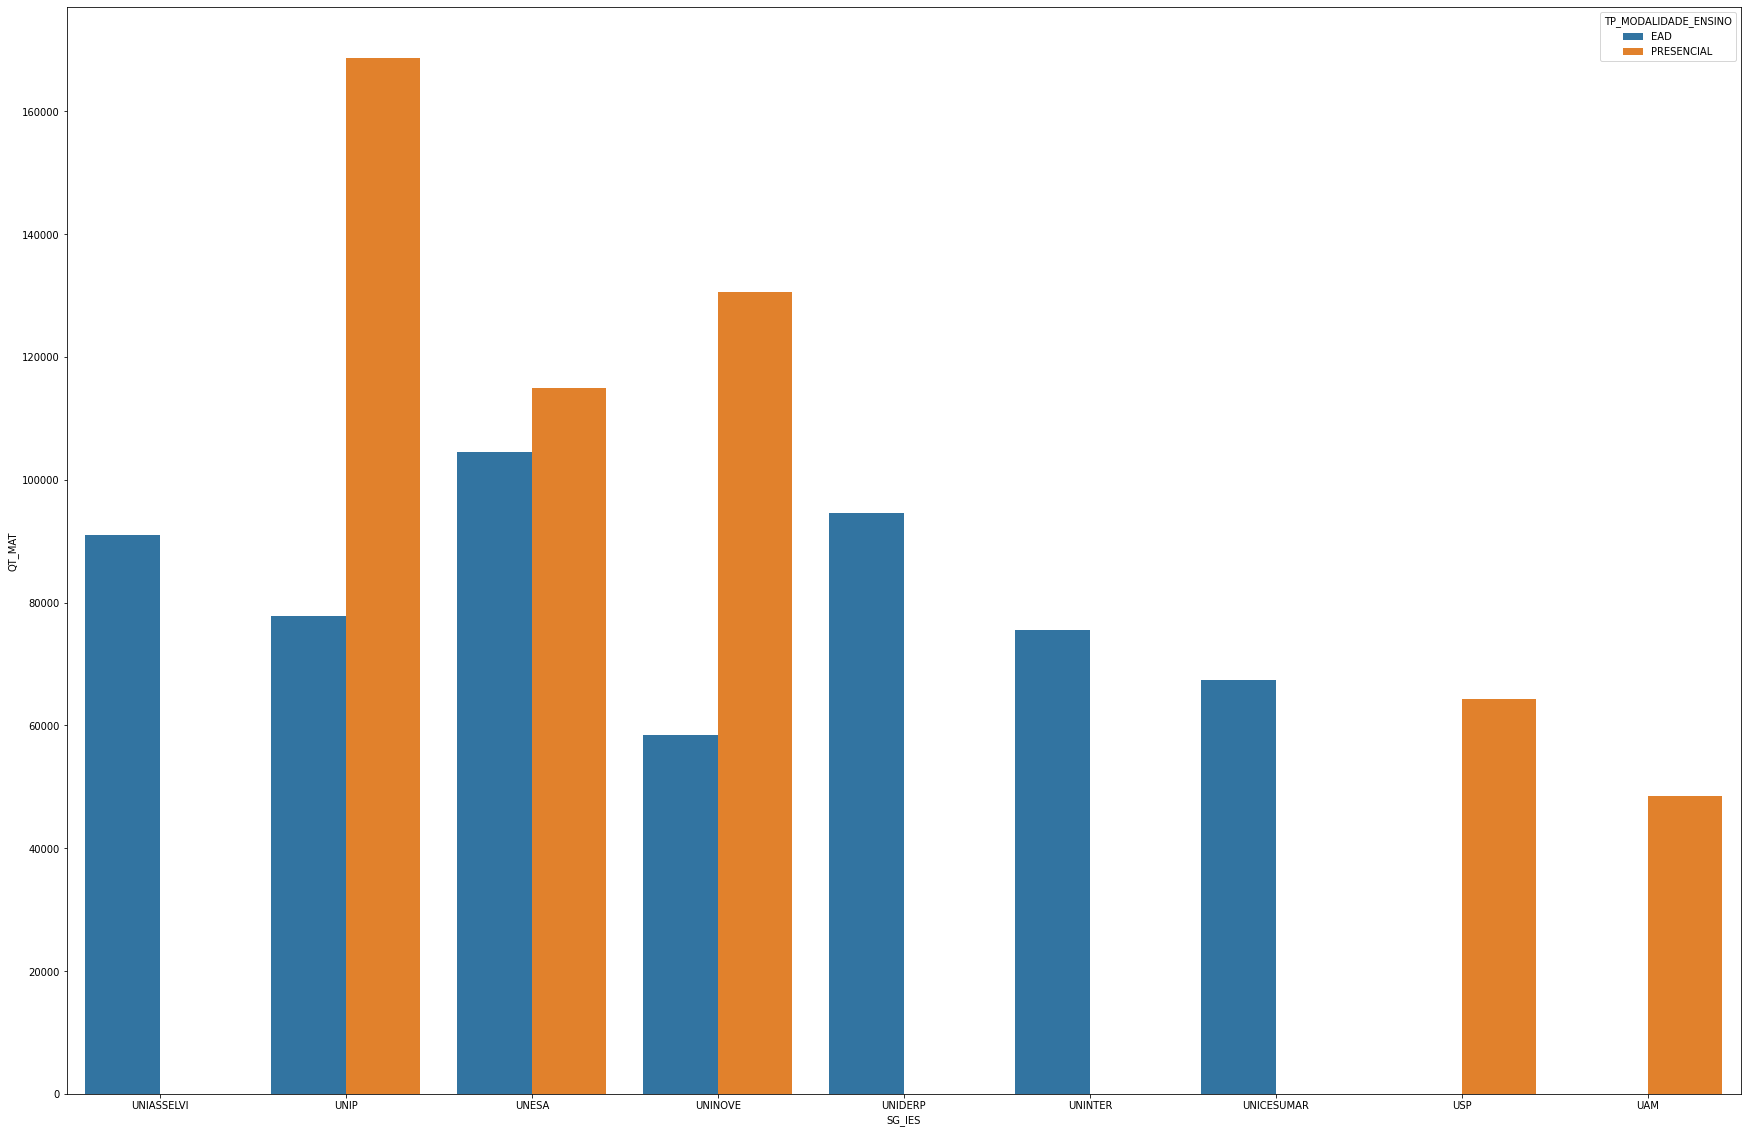

In [43]:
#Plotando um gráfico diferente
plt.figure(figsize=(30,20))
sns.barplot(data=df_4_filtered, x='SG_IES', y='QT_MAT', hue='TP_MODALIDADE_ENSINO', ci=0)
plt.show()

## Como é a distribuição das características dos alunos (sexo, cor, idade, nacionalidade, etc) nos cursos de graduação?

In [44]:
df_5 = df_cursos.copy()[['NO_CINE_ROTULO', 'NO_CINE_AREA_ESPECIFICA', 'QT_MAT', 'QT_MAT_FEM', 'QT_MAT_MASC', 'QT_MAT_0_17', 'QT_MAT_18_24', 'QT_MAT_25_29', 'QT_MAT_30_34', 'QT_MAT_35_39', 'QT_MAT_40_49', 'QT_MAT_50_59', 'QT_MAT_60_MAIS', 'QT_MAT_BRANCA', 'QT_MAT_PRETA', 'QT_MAT_PARDA', 'QT_MAT_AMARELA', 'QT_MAT_INDIGENA', 'QT_MAT_CORND']]
df_5

,NO_CINE_ROTULO,NO_CINE_AREA_ESPECIFICA,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,QT_MAT_INDIGENA,QT_MAT_CORND
0,Pedagogia,Educação,38,37,1,0,3,2,11,10,12,0,0,9,4,22,2,1,0
1,Computação formação de professor,Educação,28,21,7,0,3,5,5,5,8,2,0,9,4,13,1,0,1
2,Administração pública,Negócios e administração,34,22,12,0,3,5,5,12,6,3,0,12,2,20,0,0,0
3,Matemática formação de professor,Educação,22,12,10,0,0,2,6,6,7,1,0,11,2,9,0,0,0
4,Pedagogia,Educação,33,32,1,0,6,9,3,8,5,2,0,6,7,20,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335624,Engenharia mecânica,Engenharia e profissões correlatas,378,46,332,0,276,90,5,2,4,1,0,175,21,174,5,0,3
335625,Engenharia agrícola,Agricultura,341,145,196,1,242,72,14,9,1,1,1,142,43,151,3,1,1
335626,Zootecnia,Agricultura,279,162,117,0,209,50,13,3,3,1,0,106,27,139,4,1,2
335627,Medicina,Saúde,205,100,105,0,147,45,8,2,2,1,0,98,12,89,3,2,1


### Por sexo

In [45]:
df_sexo = pd.pivot_table(data=df_5, values=['QT_MAT_FEM', 'QT_MAT_MASC'], aggfunc='sum', columns=['NO_CINE_ROTULO']).transpose()
df_sexo.reset_index(inplace=True)
df_sexo

,NO_CINE_ROTULO,QT_MAT_FEM,QT_MAT_MASC
0,ABI Artes e humanidades,3904,2819
1,"ABI Ciências naturais, matemática e estatística",2429,2298
2,"ABI Ciências sociais, comunicação e informação",1928,1812
3,ABI Computação e Tecnologias da Informação e C...,27,167
4,ABI Educação,643,382
...,...,...,...
345,Transporte aéreo,68,58
346,Transporte terrestre,181,615
347,Turismo,14357,7535
348,Viticultura e enologia,296,215


In [46]:
df_sexo['DIF'] = df_sexo['QT_MAT_MASC'] - df_sexo['QT_MAT_FEM']
df_sexo['TOTAL'] = df_sexo['QT_MAT_MASC'] + df_sexo['QT_MAT_FEM']
df_sexo

,NO_CINE_ROTULO,QT_MAT_FEM,QT_MAT_MASC,DIF,TOTAL
0,ABI Artes e humanidades,3904,2819,-1085,6723
1,"ABI Ciências naturais, matemática e estatística",2429,2298,-131,4727
2,"ABI Ciências sociais, comunicação e informação",1928,1812,-116,3740
3,ABI Computação e Tecnologias da Informação e C...,27,167,140,194
4,ABI Educação,643,382,-261,1025
...,...,...,...,...,...
345,Transporte aéreo,68,58,-10,126
346,Transporte terrestre,181,615,434,796
347,Turismo,14357,7535,-6822,21892
348,Viticultura e enologia,296,215,-81,511


In [47]:
df_predom_masc = df_sexo.loc[df_sexo['DIF'] > 0 ]
df_predom_masc.sort_values('DIF', inplace=True, ascending=False)
df_predom_masc.reset_index(inplace=True, drop=True)
df_predom_masc

/var/folders/33/lx7s1lc53td6kjf6fs9ybgh00000gn/T/ipykernel_825/2124047019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predom_masc.sort_values('DIF', inplace=True, ascending=False)


,NO_CINE_ROTULO,QT_MAT_FEM,QT_MAT_MASC,DIF,TOTAL
0,Sistemas de informação,32042,177160,145118,209202
1,Engenharia civil,69973,164360,94387,234333
2,Engenharia mecânica,11491,99716,88225,111207
3,Engenharia elétrica,11924,84951,73027,96875
4,Educação física,82745,148763,66018,231508
...,...,...,...,...,...
166,Silvicultura,53,57,4,110
167,Engenharia de recursos hídricos,487,491,4,978
168,Papel e celulose,0,3,3,3
169,Sistemas biomédicos,312,313,1,625


In [48]:
df_predom_fem = df_sexo.loc[df_sexo['DIF'] < 0 ]
df_predom_fem.sort_values('DIF', inplace=True, ascending=True)
df_predom_fem.reset_index(inplace=True, drop=True)
df_predom_fem

/var/folders/33/lx7s1lc53td6kjf6fs9ybgh00000gn/T/ipykernel_825/2453283503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predom_fem.sort_values('DIF', inplace=True, ascending=True)


,NO_CINE_ROTULO,QT_MAT_FEM,QT_MAT_MASC,DIF,TOTAL
0,Pedagogia,751287,65140,-686147,816427
1,Enfermagem,280364,54415,-225949,334779
2,Psicologia,219440,56331,-163109,275771
3,Gestão de pessoas,153180,41200,-111980,194380
4,Serviço social,119013,13602,-105411,132615
...,...,...,...,...,...
168,Irrigação e drenagem,129,119,-10,248
169,Transporte aéreo,68,58,-10,126
170,Gestão de resíduos,20,13,-7,33
171,Letras português outras línguas estrangeiras m...,15,8,-7,23


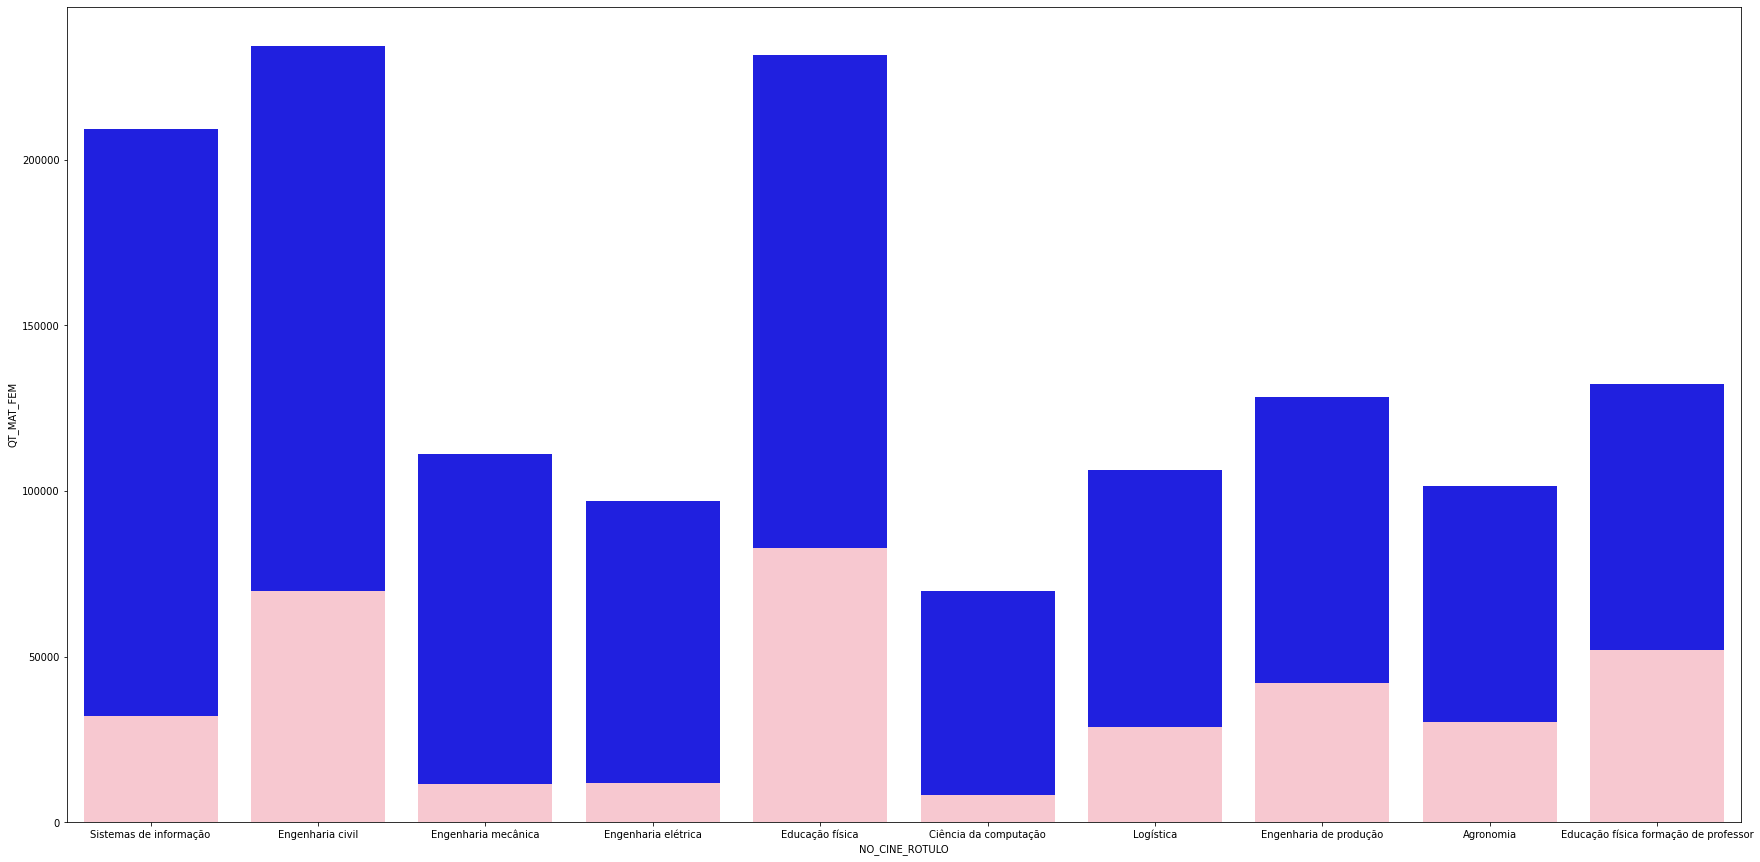

In [49]:
plt.figure(figsize=(30,15))
s1 = sns.barplot(data=df_predom_masc[:10], x='NO_CINE_ROTULO', y='TOTAL', color='blue')
s2 = sns.barplot(data=df_predom_masc[:10], x='NO_CINE_ROTULO', y='QT_MAT_FEM', color='pink')
plt.show()

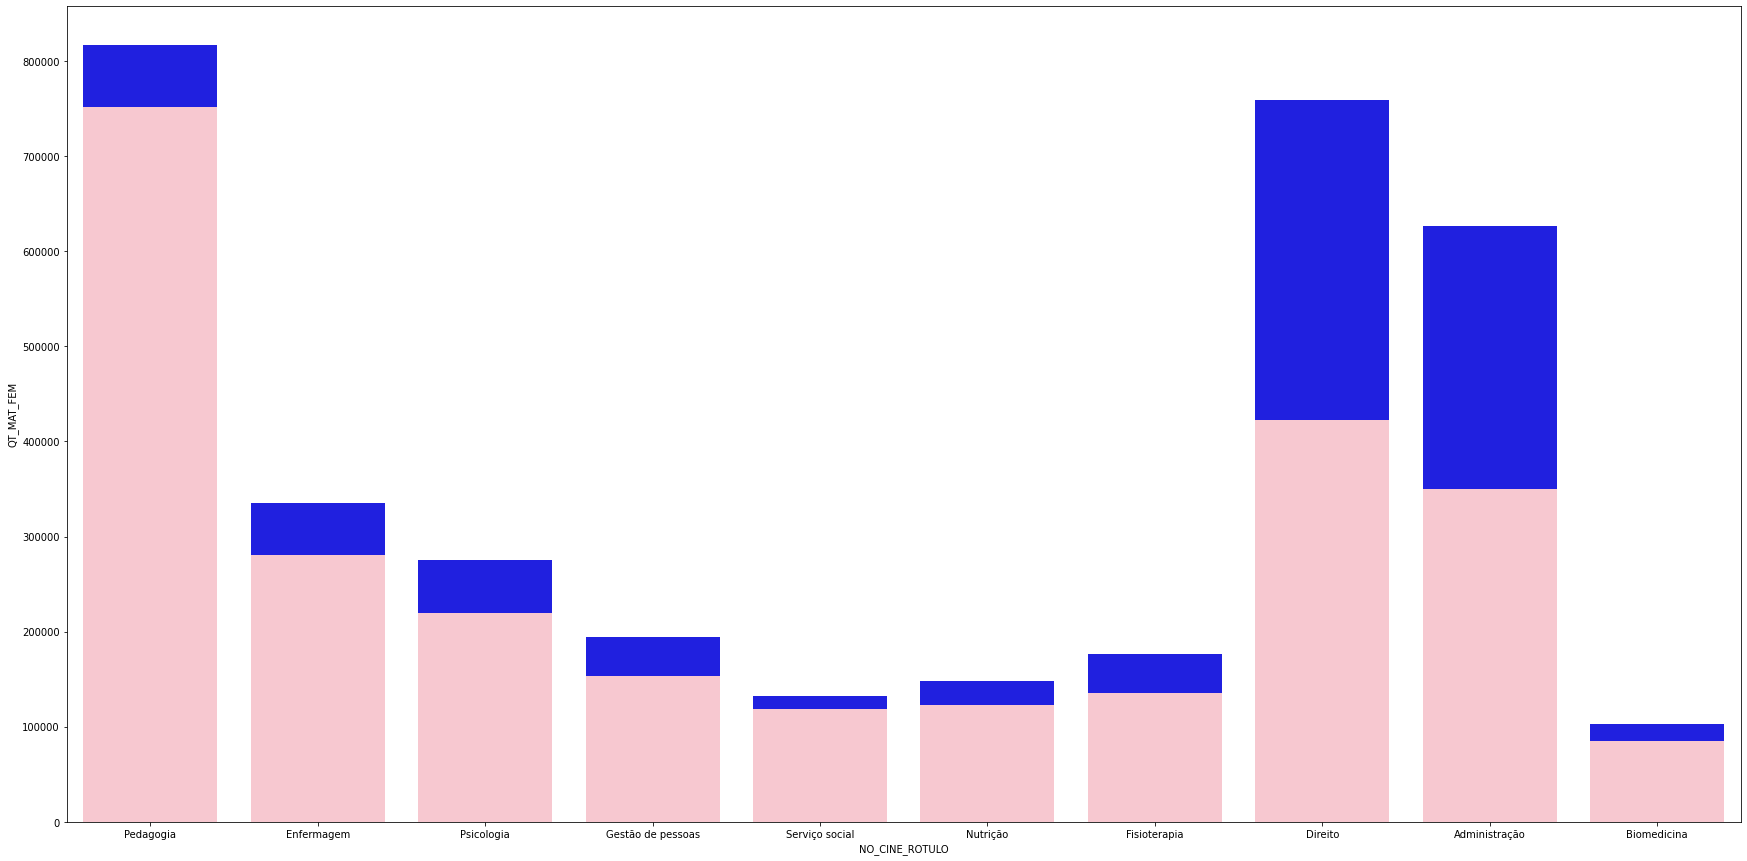

In [50]:
plt.figure(figsize=(30,15))
s1 = sns.barplot(data=df_predom_fem[:10], x='NO_CINE_ROTULO', y='TOTAL', color='blue')
s2 = sns.barplot(data=df_predom_fem[:10], x='NO_CINE_ROTULO', y='QT_MAT_FEM', color='pink')
plt.show()

#### E no Brasil como um todo?

In [51]:
mulheres = df_sexo['QT_MAT_FEM'].sum()
homens = df_sexo['QT_MAT_MASC'].sum()

In [52]:
labels = 'Homens', 'Mulheres'
values = [homens, mulheres]

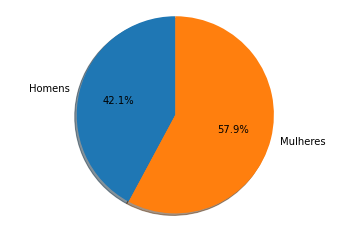

In [53]:
fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Por idade

In [54]:
df_idade = pd.pivot_table(data=df_5, values=['QT_MAT_0_17', 'QT_MAT_18_24', 'QT_MAT_25_29','QT_MAT_30_34', 'QT_MAT_35_39', 'QT_MAT_40_49', 'QT_MAT_50_59','QT_MAT_60_MAIS'], aggfunc='sum', columns=['NO_CINE_ROTULO']).transpose()
df_idade.reset_index(inplace=True)
df_idade

,NO_CINE_ROTULO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS
0,ABI Artes e humanidades,4,4503,957,467,261,300,174,57
1,"ABI Ciências naturais, matemática e estatística",11,4048,427,142,41,38,15,5
2,"ABI Ciências sociais, comunicação e informação",5,2650,495,250,126,137,57,20
3,ABI Computação e Tecnologias da Informação e C...,2,149,22,9,4,7,1,0
4,ABI Educação,7,600,163,102,86,54,10,3
...,...,...,...,...,...,...,...,...,...
345,Transporte aéreo,0,50,35,18,12,10,1,0
346,Transporte terrestre,1,150,129,141,131,163,74,7
347,Turismo,41,11005,3874,2044,1527,1986,1109,306
348,Viticultura e enologia,0,246,98,48,36,51,24,8


In [55]:
df_idade['TOTAL'] = df_idade.sum(axis=1)
df_idade

/var/folders/33/lx7s1lc53td6kjf6fs9ybgh00000gn/T/ipykernel_825/1905850855.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_idade['TOTAL'] = df_idade.sum(axis=1)


,NO_CINE_ROTULO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,TOTAL
0,ABI Artes e humanidades,4,4503,957,467,261,300,174,57,6723
1,"ABI Ciências naturais, matemática e estatística",11,4048,427,142,41,38,15,5,4727
2,"ABI Ciências sociais, comunicação e informação",5,2650,495,250,126,137,57,20,3740
3,ABI Computação e Tecnologias da Informação e C...,2,149,22,9,4,7,1,0,194
4,ABI Educação,7,600,163,102,86,54,10,3,1025
...,...,...,...,...,...,...,...,...,...,...
345,Transporte aéreo,0,50,35,18,12,10,1,0,126
346,Transporte terrestre,1,150,129,141,131,163,74,7,796
347,Turismo,41,11005,3874,2044,1527,1986,1109,306,21892
348,Viticultura e enologia,0,246,98,48,36,51,24,8,511


In [56]:
df_idade['%Adolescente'] = round(df_idade['QT_MAT_0_17']/df_idade['TOTAL']*100,2)
df_idade['%Jovem'] = round(df_idade['QT_MAT_18_24']/df_idade['TOTAL']*100,2)
df_idade['%Adulto'] = round((df_idade['QT_MAT_25_29']+df_idade['QT_MAT_30_34']+df_idade['QT_MAT_35_39']+df_idade['QT_MAT_40_49'])/df_idade['TOTAL']*100,2)
df_idade['%Idosos'] = round((df_idade['QT_MAT_50_59']+df_idade['QT_MAT_60_MAIS'])/df_idade['TOTAL']*100,2)
df_idade.drop(['QT_MAT_0_17', 'QT_MAT_18_24', 'QT_MAT_25_29','QT_MAT_30_34', 'QT_MAT_35_39', 'QT_MAT_40_49', 'QT_MAT_50_59','QT_MAT_60_MAIS'], axis=1, inplace=True)
df_idade

,NO_CINE_ROTULO,TOTAL,%Adolescente,%Jovem,%Adulto,%Idosos
0,ABI Artes e humanidades,6723,0.06,66.98,29.53,3.44
1,"ABI Ciências naturais, matemática e estatística",4727,0.23,85.64,13.71,0.42
2,"ABI Ciências sociais, comunicação e informação",3740,0.13,70.86,26.95,2.06
3,ABI Computação e Tecnologias da Informação e C...,194,1.03,76.80,21.65,0.52
4,ABI Educação,1025,0.68,58.54,39.51,1.27
...,...,...,...,...,...,...
345,Transporte aéreo,126,0.00,39.68,59.52,0.79
346,Transporte terrestre,796,0.13,18.84,70.85,10.18
347,Turismo,21892,0.19,50.27,43.08,6.46
348,Viticultura e enologia,511,0.00,48.14,45.60,6.26


In [57]:
df_adolescente = df_idade.sort_values('%Adolescente', ascending=False).head(1)
df_jovem = df_idade.sort_values('%Jovem', ascending=False).head(1)
df_adulto = df_idade.sort_values('%Adulto', ascending=False).head(1)
df_idoso = df_idade.sort_values('%Idosos', ascending=False).head(1)

In [59]:
fig = go.Figure(go.Waterfall(
    name = "Proporção Idades", orientation = "v",
    measure = ["relative", "relative", "relative", "relative", "total"],
    x = ["Adolescente", "Jovem", "Adulto", "Idosos", "Total"],
    y = [df_adolescente['%Adolescente'].values[0], df_adolescente['%Jovem'].values[0], df_adolescente['%Adulto'].values[0], df_adolescente['%Idosos'].values[0], 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

curso = df_adolescente['NO_CINE_ROTULO'].values[0]

fig.update_layout(
        title = f'Distribuição por Idade do Curso de {curso}',
        showlegend = True
)

fig.show()

In [60]:
fig = go.Figure(go.Waterfall(
    name = "Proporção Idades", orientation = "v",
    measure = ["relative", "relative", "relative", "relative", "total"],
    x = ["Adolescente", "Jovem", "Adulto", "Idosos", "Total"],
    y = [df_jovem['%Adolescente'].values[0], df_jovem['%Jovem'].values[0], df_jovem['%Adulto'].values[0], df_jovem['%Idosos'].values[0], 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

curso = df_jovem['NO_CINE_ROTULO'].values[0]

fig.update_layout(
        title = f'Distribuição por Idade do Curso de {curso}',
        showlegend = True
)

fig.show()

In [61]:
fig = go.Figure(go.Waterfall(
    name = "Proporção Idades", orientation = "v",
    measure = ["relative", "relative", "relative", "relative", "total"],
    x = ["Adolescente", "Jovem", "Adulto", "Idosos", "Total"],
    y = [df_adulto['%Adolescente'].values[0], df_adulto['%Jovem'].values[0], df_adulto['%Adulto'].values[0], df_adulto['%Idosos'].values[0], 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

curso = df_adulto['NO_CINE_ROTULO'].values[0]

fig.update_layout(
        title = f'Distribuição por Idade do Curso de {curso}',
        showlegend = True
)

fig.show()

In [62]:
fig = go.Figure(go.Waterfall(
    name = "Proporção Idades", orientation = "v",
    measure = ["relative", "relative", "relative", "relative", "total"],
    x = ["Adolescente", "Jovem", "Adulto", "Idosos", "Total"],
    y = [df_idoso['%Adolescente'].values[0], df_idoso['%Jovem'].values[0], df_idoso['%Adulto'].values[0], df_idoso['%Idosos'].values[0], 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

curso = df_idoso['NO_CINE_ROTULO'].values[0]

fig.update_layout(
        title = f'Distribuição por Idade do Curso de {curso}',
        showlegend = True
)

fig.show()

#### E no Brasil como um todo?

In [63]:
df_idade = pd.pivot_table(data=df_5, values=['QT_MAT_0_17', 'QT_MAT_18_24', 'QT_MAT_25_29','QT_MAT_30_34', 'QT_MAT_35_39', 'QT_MAT_40_49', 'QT_MAT_50_59','QT_MAT_60_MAIS'], aggfunc='sum', columns=['NO_CINE_ROTULO']).transpose()
df_idade.reset_index(inplace=True)
df_idade

,NO_CINE_ROTULO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS
0,ABI Artes e humanidades,4,4503,957,467,261,300,174,57
1,"ABI Ciências naturais, matemática e estatística",11,4048,427,142,41,38,15,5
2,"ABI Ciências sociais, comunicação e informação",5,2650,495,250,126,137,57,20
3,ABI Computação e Tecnologias da Informação e C...,2,149,22,9,4,7,1,0
4,ABI Educação,7,600,163,102,86,54,10,3
...,...,...,...,...,...,...,...,...,...
345,Transporte aéreo,0,50,35,18,12,10,1,0
346,Transporte terrestre,1,150,129,141,131,163,74,7
347,Turismo,41,11005,3874,2044,1527,1986,1109,306
348,Viticultura e enologia,0,246,98,48,36,51,24,8


In [64]:
adolescentes = df_idade['QT_MAT_0_17'].sum()
jovem = df_idade['QT_MAT_18_24'].sum()
adulto = (df_idade['QT_MAT_25_29']+df_idade['QT_MAT_30_34']+df_idade['QT_MAT_35_39']+df_idade['QT_MAT_40_49']).sum()
idoso = (df_idade['QT_MAT_50_59']+df_idade['QT_MAT_60_MAIS']).sum()

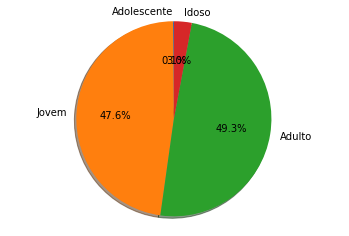

In [90]:
labels = 'Adolescente', 'Jovem', 'Adulto', 'Idoso'
values = [adolescentes, jovem, adulto, idoso]
fig, ax = plt.subplots()

ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

### Por cor

In [66]:
df_cor = pd.pivot_table(data=df_5, values=['QT_MAT_BRANCA', 'QT_MAT_PRETA', 'QT_MAT_PARDA','QT_MAT_AMARELA', 'QT_MAT_INDIGENA', 'QT_MAT_CORND'], aggfunc='sum', columns=['NO_CINE_ROTULO']).transpose()
df_cor.reset_index(inplace=True)
df_cor

,NO_CINE_ROTULO,QT_MAT_AMARELA,QT_MAT_BRANCA,QT_MAT_CORND,QT_MAT_INDIGENA,QT_MAT_PARDA,QT_MAT_PRETA
0,ABI Artes e humanidades,180,4417,243,17,1244,622
1,"ABI Ciências naturais, matemática e estatística",135,3075,218,5,935,359
2,"ABI Ciências sociais, comunicação e informação",45,2168,169,11,830,517
3,ABI Computação e Tecnologias da Informação e C...,3,59,1,1,95,35
4,ABI Educação,25,283,6,183,394,134
...,...,...,...,...,...,...,...
345,Transporte aéreo,0,79,4,1,36,6
346,Transporte terrestre,4,319,221,1,177,74
347,Turismo,354,7674,4327,125,7164,2248
348,Viticultura e enologia,7,310,54,1,113,26


In [67]:
df_cor['TOTAL'] = df_cor.sum(axis=1)
df_cor

/var/folders/33/lx7s1lc53td6kjf6fs9ybgh00000gn/T/ipykernel_825/934627636.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,NO_CINE_ROTULO,QT_MAT_AMARELA,QT_MAT_BRANCA,QT_MAT_CORND,QT_MAT_INDIGENA,QT_MAT_PARDA,QT_MAT_PRETA,TOTAL
0,ABI Artes e humanidades,180,4417,243,17,1244,622,6723
1,"ABI Ciências naturais, matemática e estatística",135,3075,218,5,935,359,4727
2,"ABI Ciências sociais, comunicação e informação",45,2168,169,11,830,517,3740
3,ABI Computação e Tecnologias da Informação e C...,3,59,1,1,95,35,194
4,ABI Educação,25,283,6,183,394,134,1025
...,...,...,...,...,...,...,...,...
345,Transporte aéreo,0,79,4,1,36,6,126
346,Transporte terrestre,4,319,221,1,177,74,796
347,Turismo,354,7674,4327,125,7164,2248,21892
348,Viticultura e enologia,7,310,54,1,113,26,511


In [68]:
df_cor['%Amarelo'] = round(df_cor['QT_MAT_AMARELA']/df_cor['TOTAL']*100,2)
df_cor['%Branco'] = round(df_cor['QT_MAT_BRANCA']/df_cor['TOTAL']*100,2)
df_cor['%CorNaoDef'] = round(df_cor['QT_MAT_CORND']/df_cor['TOTAL']*100,2)
df_cor['%Indigena'] = round(df_cor['QT_MAT_INDIGENA']/df_cor['TOTAL']*100,2)
df_cor['%Pardo'] = round(df_cor['QT_MAT_PARDA']/df_cor['TOTAL']*100,2)
df_cor['%Preto'] = round(df_cor['QT_MAT_PRETA']/df_cor['TOTAL']*100,2)
df_cor.drop(['QT_MAT_AMARELA', 'QT_MAT_BRANCA', 'QT_MAT_CORND', 'QT_MAT_INDIGENA', 'QT_MAT_PARDA', 'QT_MAT_PRETA'], axis=1, inplace=True)
df_cor

,NO_CINE_ROTULO,TOTAL,%Amarelo,%Branco,%CorNaoDef,%Indigena,%Pardo,%Preto
0,ABI Artes e humanidades,6723,2.68,65.70,3.61,0.25,18.50,9.25
1,"ABI Ciências naturais, matemática e estatística",4727,2.86,65.05,4.61,0.11,19.78,7.59
2,"ABI Ciências sociais, comunicação e informação",3740,1.20,57.97,4.52,0.29,22.19,13.82
3,ABI Computação e Tecnologias da Informação e C...,194,1.55,30.41,0.52,0.52,48.97,18.04
4,ABI Educação,1025,2.44,27.61,0.59,17.85,38.44,13.07
...,...,...,...,...,...,...,...,...
345,Transporte aéreo,126,0.00,62.70,3.17,0.79,28.57,4.76
346,Transporte terrestre,796,0.50,40.08,27.76,0.13,22.24,9.30
347,Turismo,21892,1.62,35.05,19.77,0.57,32.72,10.27
348,Viticultura e enologia,511,1.37,60.67,10.57,0.20,22.11,5.09


In [69]:
df_amarelo = df_cor.sort_values('%Amarelo', ascending=False).head(1)
df_branco = df_cor.sort_values('%Branco', ascending=False).head(1)
df_cnd = df_cor.sort_values('%CorNaoDef', ascending=False).head(1)
df_indigena = df_cor.sort_values('%Indigena', ascending=False).head(1)
df_pardo = df_cor.sort_values('%Pardo', ascending=False).head(1)
df_preto = df_cor.sort_values('%Preto', ascending=False).head(1)

In [70]:
fig = go.Figure(go.Waterfall(
    name = "Proporção Cor", orientation = "v",
    measure = ["relative", "relative", "relative", "relative", "relative","relative", "total"],
    x = ["Amarelo", "Branco", "Cor Não Def.", "Indigena", "Pardo", "Preto", "Total"],
    y = [df_amarelo['%Amarelo'].values[0], df_amarelo['%Branco'].values[0], df_amarelo['%CorNaoDef'].values[0], df_amarelo['%Indigena'].values[0], df_amarelo['%Pardo'].values[0], df_amarelo['%Preto'].values[0], 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

curso = df_amarelo['NO_CINE_ROTULO'].values[0]

fig.update_layout(
        title = f'Distribuição por Cor do Curso de "{curso}"',
        showlegend = True
)

fig.show()

In [71]:
fig = go.Figure(go.Waterfall(
    name = "Proporção Cor", orientation = "v",
    measure = ["relative", "relative", "relative", "relative", "relative","relative", "total"],
    x = ["Amarelo", "Branco", "Cor Não Def.", "Indigena", "Pardo", "Preto", "Total"],
    y = [df_branco['%Amarelo'].values[0], df_branco['%Branco'].values[0], df_branco['%CorNaoDef'].values[0], df_branco['%Indigena'].values[0], df_branco['%Pardo'].values[0], df_branco['%Preto'].values[0], 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

curso = df_branco['NO_CINE_ROTULO'].values[0]

fig.update_layout(
        title = f'Distribuição por Cor do Curso de "{curso}"',
        showlegend = True
)

fig.show()

In [72]:
fig = go.Figure(go.Waterfall(
    name = "Proporção Cor", orientation = "v",
    measure = ["relative", "relative", "relative", "relative", "relative","relative", "total"],
    x = ["Amarelo", "Branco", "Cor Não Def.", "Indigena", "Pardo", "Preto", "Total"],
    y = [df_cnd['%Amarelo'].values[0], df_cnd['%Branco'].values[0], df_cnd['%CorNaoDef'].values[0], df_cnd['%Indigena'].values[0], df_cnd['%Pardo'].values[0], df_cnd['%Preto'].values[0], 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

curso = df_cnd['NO_CINE_ROTULO'].values[0]

fig.update_layout(
        title = f'Distribuição por Cor do Curso de "{curso}"',
        showlegend = True
)

fig.show()

In [73]:
fig = go.Figure(go.Waterfall(
    name = "Proporção Cor", orientation = "v",
    measure = ["relative", "relative", "relative", "relative", "relative","relative", "total"],
    x = ["Amarelo", "Branco", "Cor Não Def.", "Indigena", "Pardo", "Preto", "Total"],
    y = [df_indigena['%Amarelo'].values[0], df_indigena['%Branco'].values[0], df_indigena['%CorNaoDef'].values[0], df_indigena['%Indigena'].values[0], df_indigena['%Pardo'].values[0], df_indigena['%Preto'].values[0], 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

curso = df_indigena['NO_CINE_ROTULO'].values[0]

fig.update_layout(
        title = f'Distribuição por Cor do Curso de "{curso}"',
        showlegend = True
)

fig.show()

In [74]:
fig = go.Figure(go.Waterfall(
    name = "Proporção Cor", orientation = "v",
    measure = ["relative", "relative", "relative", "relative", "relative","relative", "total"],
    x = ["Amarelo", "Branco", "Cor Não Def.", "Indigena", "Pardo", "Preto", "Total"],
    y = [df_pardo['%Amarelo'].values[0], df_pardo['%Branco'].values[0], df_pardo['%CorNaoDef'].values[0], df_pardo['%Indigena'].values[0], df_pardo['%Pardo'].values[0], df_pardo['%Preto'].values[0], 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

curso = df_pardo['NO_CINE_ROTULO'].values[0]

fig.update_layout(
        title = f'Distribuição por Cor do Curso de "{curso}"',
        showlegend = True
)

fig.show()

In [75]:
fig = go.Figure(go.Waterfall(
    name = "Proporção Cor", orientation = "v",
    measure = ["relative", "relative", "relative", "relative", "relative","relative", "total"],
    x = ["Amarelo", "Branco", "Cor Não Def.", "Indigena", "Pardo", "Preto", "Total"],
    y = [df_preto['%Amarelo'].values[0], df_preto['%Branco'].values[0], df_preto['%CorNaoDef'].values[0], df_preto['%Indigena'].values[0], df_preto['%Pardo'].values[0], df_preto['%Preto'].values[0], 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

curso = df_preto['NO_CINE_ROTULO'].values[0]

fig.update_layout(
        title = f'Distribuição por Cor do Curso de "{curso}"',
        showlegend = True
)

fig.show()

### E no Brasil como um todo?

In [76]:
df_cor = pd.pivot_table(data=df_5, values=['QT_MAT_BRANCA', 'QT_MAT_PRETA', 'QT_MAT_PARDA','QT_MAT_AMARELA', 'QT_MAT_INDIGENA', 'QT_MAT_CORND'], aggfunc='sum', columns=['NO_CINE_ROTULO']).transpose()
df_cor.reset_index(inplace=True)
df_cor

,NO_CINE_ROTULO,QT_MAT_AMARELA,QT_MAT_BRANCA,QT_MAT_CORND,QT_MAT_INDIGENA,QT_MAT_PARDA,QT_MAT_PRETA
0,ABI Artes e humanidades,180,4417,243,17,1244,622
1,"ABI Ciências naturais, matemática e estatística",135,3075,218,5,935,359
2,"ABI Ciências sociais, comunicação e informação",45,2168,169,11,830,517
3,ABI Computação e Tecnologias da Informação e C...,3,59,1,1,95,35
4,ABI Educação,25,283,6,183,394,134
...,...,...,...,...,...,...,...
345,Transporte aéreo,0,79,4,1,36,6
346,Transporte terrestre,4,319,221,1,177,74
347,Turismo,354,7674,4327,125,7164,2248
348,Viticultura e enologia,7,310,54,1,113,26


In [77]:
amarelo = df_cor['QT_MAT_AMARELA'].sum()
branco = df_cor['QT_MAT_BRANCA'].sum()
corndef = df_cor['QT_MAT_CORND'].sum()
indigena = df_cor['QT_MAT_INDIGENA'].sum()
pardo = df_cor['QT_MAT_PARDA'].sum()
preto = df_cor['QT_MAT_PRETA'].sum()

In [78]:
labels = 'Amarelo(a)', 'Branco(a)', 'Cor Ñ Def', 'Indígena', 'Pardo(a)', 'Preto(a)'
values = [amarelo, branco, corndef, indigena, pardo, preto]

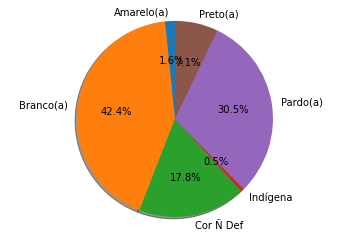

In [79]:
fig, ax = plt.subplots()

ax.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

## Brincando com Estatística

Se pegarmos 1.000 alunos, aleatoriamente, qual a probabilidade de pelo menos 80 serem pretos?

In [80]:
df_cor = pd.pivot_table(data=df_5, values=['QT_MAT_BRANCA', 'QT_MAT_PRETA', 'QT_MAT_PARDA','QT_MAT_AMARELA', 'QT_MAT_INDIGENA', 'QT_MAT_CORND'], aggfunc='sum', columns=['NO_CINE_ROTULO']).transpose()
df_cor.reset_index(inplace=True)
df_cor

,NO_CINE_ROTULO,QT_MAT_AMARELA,QT_MAT_BRANCA,QT_MAT_CORND,QT_MAT_INDIGENA,QT_MAT_PARDA,QT_MAT_PRETA
0,ABI Artes e humanidades,180,4417,243,17,1244,622
1,"ABI Ciências naturais, matemática e estatística",135,3075,218,5,935,359
2,"ABI Ciências sociais, comunicação e informação",45,2168,169,11,830,517
3,ABI Computação e Tecnologias da Informação e C...,3,59,1,1,95,35
4,ABI Educação,25,283,6,183,394,134
...,...,...,...,...,...,...,...
345,Transporte aéreo,0,79,4,1,36,6
346,Transporte terrestre,4,319,221,1,177,74
347,Turismo,354,7674,4327,125,7164,2248
348,Viticultura e enologia,7,310,54,1,113,26


In [81]:
df_cor['TOTAL'] = df_cor.sum(axis=1)
df_cor

/var/folders/33/lx7s1lc53td6kjf6fs9ybgh00000gn/T/ipykernel_825/934627636.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,NO_CINE_ROTULO,QT_MAT_AMARELA,QT_MAT_BRANCA,QT_MAT_CORND,QT_MAT_INDIGENA,QT_MAT_PARDA,QT_MAT_PRETA,TOTAL
0,ABI Artes e humanidades,180,4417,243,17,1244,622,6723
1,"ABI Ciências naturais, matemática e estatística",135,3075,218,5,935,359,4727
2,"ABI Ciências sociais, comunicação e informação",45,2168,169,11,830,517,3740
3,ABI Computação e Tecnologias da Informação e C...,3,59,1,1,95,35,194
4,ABI Educação,25,283,6,183,394,134,1025
...,...,...,...,...,...,...,...,...
345,Transporte aéreo,0,79,4,1,36,6,126
346,Transporte terrestre,4,319,221,1,177,74,796
347,Turismo,354,7674,4327,125,7164,2248,21892
348,Viticultura e enologia,7,310,54,1,113,26,511


In [82]:
total = df_cor['TOTAL'].sum()
pretos = df_cor['QT_MAT_PRETA'].sum()

In [83]:
p = pretos/total
p

0.07111529908322194

In [84]:
n = 1000

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

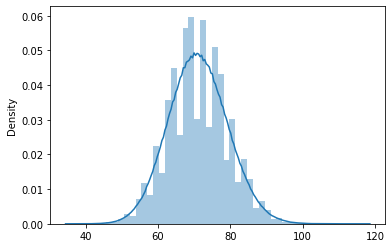

In [86]:
alunos_pretos = np.random.binomial(n, p, size=1000000)
sns.distplot(alunos_pretos)

In [87]:
probabilidade = (sum(alunos_pretos >= 80)/1000000)*100
probabilidade

15.121

In [88]:
print(f'A probabilidade de termos pelo menos 80 alunos pretos dentre 1.000 alunos é de {round(probabilidade,2)}%')

A probabilidade de termos pelo menos 80 alunos pretos dentre 1.000 alunos é de 15.12%
